In [294]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

https://www.kaggle.com/alexisbcook/data-for-datavis?select=candy.csv

In [295]:
df = pd.read_csv('candy.csv')
df

,id,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,78,Twizzlers,No,Yes,No,No,No,No,No,No,No,0.220,0.116,45.466282
79,79,Warheads,No,Yes,No,No,No,No,Yes,No,No,0.093,0.116,39.011898
80,80,Welch's Fruit Snacks,No,Yes,No,No,No,No,No,No,Yes,0.313,0.313,44.375519
81,81,Werther's Original Caramel,No,No,Yes,No,No,No,Yes,No,No,0.186,0.267,41.904308


### 1. Гистограмма победа - содержание сахара

In [638]:
df_sugpriwin = df[['competitorname', 'sugarpercent', 'pricepercent', 'winpercent']]

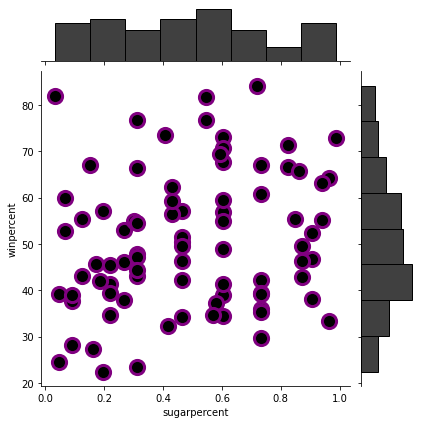

In [665]:
sns.jointplot(x=df_sugpriwin['sugarpercent'], y=df_sugpriwin['winpercent'], kind='scatter', s=200, color='black', edgecolor='purple', linewidth=3)

plt.show()

Видим, что высокие оценки (выше 75) получили сладости со средним содержанием сахара, за исключением одного случая с минимальным содержанием. И низкие оценки (ниже 30) чаще у тех, чьи производители сахара пожалели. Так же можно обратить внимание на некую группу с высоким содержанием сахара (выше 0,6) и довольно низкими оценками (от 30 до 50). Вероятно, у них дело не столько в нём, сколько в общей рецептуре. И, глядя на боковую гистограмму по winpercent, видим, что потребители чаще ставили оценки средние и ниже среднего, определённо жалуя высокой оценкой некоторых фаворитов. 
Подводя итог, можно сказать, что процент содержания сахара в сладости напрямую влияет на её оценку, но только до известного предела.

### 2. Scatterplot сладость - цена - победа - ингредиент

In [651]:
# хочу построить scatterplot с разделением на ингредиенты
# для этого делаю следующее:
# создаём дф с ингредиентами, со столбцом другое

df_ingredient = df[['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer']]
df_ingredient['other'] = 'No'
df_ingredient.loc[(df_ingredient.chocolate == 'No') & (df_ingredient.fruity == 'No') & (df_ingredient.caramel == 'No')
                  & (df_ingredient.peanutyalmondy == 'No') & (df_ingredient.nougat == 'No') & (df_ingredient.crispedricewafer == 'No'), ['other']] = 'Yes'
df_ingredient



,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,other
0,100 Grand,Yes,No,Yes,No,No,Yes,No
1,3 Musketeers,Yes,No,No,No,Yes,No,No
2,Air Heads,No,Yes,No,No,No,No,No
3,Almond Joy,Yes,No,No,Yes,No,No,No
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...
78,Twizzlers,No,Yes,No,No,No,No,No
79,Warheads,No,Yes,No,No,No,No,No
80,Welch's Fruit Snacks,No,Yes,No,No,No,No,No
81,Werther's Original Caramel,No,No,Yes,No,No,No,No


In [652]:
# причёсываем к виду "название"-"ингредиент"

df_ingredient.set_index('competitorname', inplace=True)
tidy = df_ingredient.stack().reset_index().rename(columns={'level_1': 'ingredient', 0: "values"})
tidy = tidy[tidy['values'] == 'Yes']
tidy = tidy.drop('values', 1)
tidy

,competitorname,ingredient
0,100 Grand,chocolate
2,100 Grand,caramel
5,100 Grand,crispedricewafer
7,3 Musketeers,chocolate
11,3 Musketeers,nougat
...,...,...
554,Warheads,fruity
561,Welch's Fruit Snacks,fruity
569,Werther's Original Caramel,caramel
574,Whoppers,chocolate


In [654]:
# добавляем инфо по содержанию сахара, цене, оценке

df_sctrplt = tidy.merge(df_sugpriwin, how='outer')
df_sctrplt

,competitorname,ingredient,sugarpercent,pricepercent,winpercent
0,100 Grand,chocolate,0.732,0.860,66.971725
1,100 Grand,caramel,0.732,0.860,66.971725
2,100 Grand,crispedricewafer,0.732,0.860,66.971725
3,3 Musketeers,chocolate,0.604,0.511,67.602936
4,3 Musketeers,nougat,0.604,0.511,67.602936
...,...,...,...,...,...
116,Warheads,fruity,0.093,0.116,39.011898
117,Welch's Fruit Snacks,fruity,0.313,0.313,44.375519
118,Werther's Original Caramel,caramel,0.186,0.267,41.904308
119,Whoppers,chocolate,0.872,0.848,49.524113


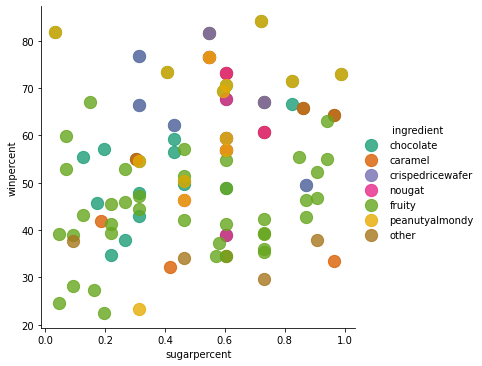

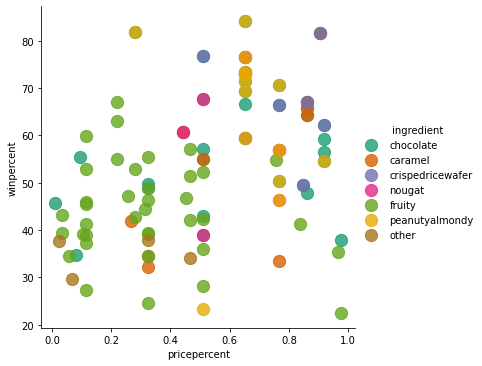

In [655]:
sns.lmplot(data=df_sctrplt, x='sugarpercent', y='winpercent', fit_reg=False, hue='ingredient', scatter_kws={'s': 150}, legend=True, palette="Dark2")
sns.lmplot(data=df_sctrplt, x='pricepercent', y='winpercent', fit_reg=False, hue='ingredient', scatter_kws={'s': 150}, legend=True, palette="Dark2")
plt.show()

Обнаруживаем много фруктовых сладостей среди всех представленных, при этом они явно уступают тем, у кого в составе нуга, карамель, орехи и вафли.
По всей видимости, на этом конкурсе в топе оказались шоколадные батончики и несколько видов фруктовых леденцов или конфет.

### 3. Boxplot вид конфеты.

In [658]:
# интересно посмотреть популярность по видам сладости

df_candytype = df[['competitorname', 'hard', 'bar']] 
df_candytype['other'] = 'No'
df_candytype.loc[(df_candytype['hard'] == 'No') & (df_candytype['bar'] == 'No'), ['other']] = 'Yes'
df_candytype.set_index('competitorname', inplace=True)
df_candytype

,hard,bar,other
competitorname,,,
100 Grand,No,Yes,No
3 Musketeers,No,Yes,No
Air Heads,No,No,Yes
Almond Joy,No,Yes,No
Baby Ruth,No,Yes,No
...,...,...,...
Twizzlers,No,No,Yes
Warheads,Yes,No,No
Welch's Fruit Snacks,No,No,Yes


In [659]:
# соберем таблицу с видами

df_candytype = df_candytype.stack().reset_index().rename(columns={'level_1': 'candytype', 0: 'values'})
df_candytype = df_candytype[df_candytype['values'] == 'Yes']
df_candytype

,competitorname,candytype,values
1,100 Grand,bar,Yes
4,3 Musketeers,bar,Yes
8,Air Heads,other,Yes
10,Almond Joy,bar,Yes
13,Baby Ruth,bar,Yes
...,...,...,...
236,Twizzlers,other,Yes
237,Warheads,hard,Yes
242,Welch's Fruit Snacks,other,Yes
243,Werther's Original Caramel,hard,Yes


In [660]:
df_candytype = df_candytype.merge(df_sugpriwin, on='competitorname').drop('values', 1)
df_candytype

,competitorname,candytype,sugarpercent,pricepercent,winpercent
0,100 Grand,bar,0.732,0.860,66.971725
1,3 Musketeers,bar,0.604,0.511,67.602936
2,Air Heads,other,0.906,0.511,52.341465
3,Almond Joy,bar,0.465,0.767,50.347546
4,Baby Ruth,bar,0.604,0.767,56.914547
...,...,...,...,...,...
78,Twizzlers,other,0.220,0.116,45.466282
79,Warheads,hard,0.093,0.116,39.011898
80,Welch's Fruit Snacks,other,0.313,0.313,44.375519
81,Werther's Original Caramel,hard,0.186,0.267,41.904308


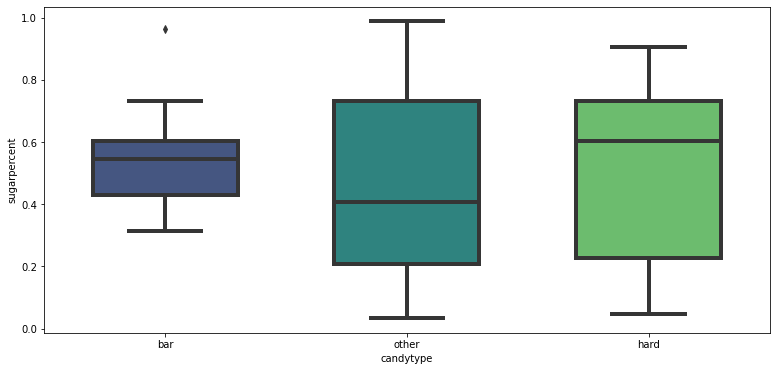

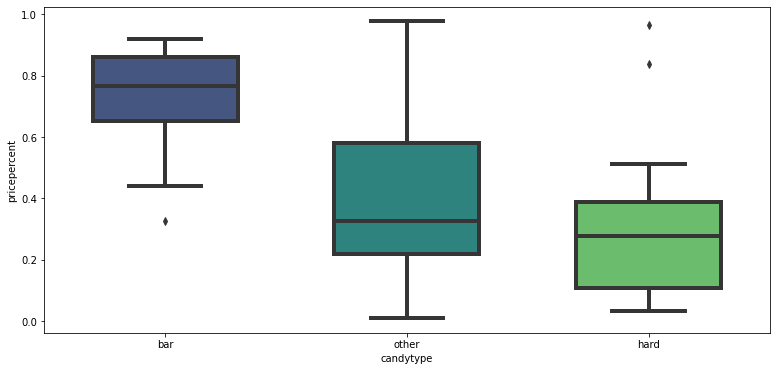

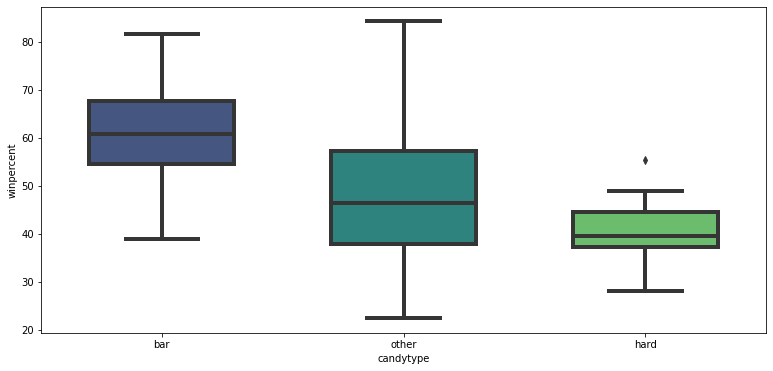

In [661]:
sns.boxplot(x=df_candytype['candytype'], y=df_candytype['sugarpercent'], linewidth=4, width=0.6, palette='viridis')
plt.show()
sns.boxplot(x=df_candytype['candytype'], y=df_candytype['pricepercent'], linewidth=4, width=0.6, palette='viridis')
plt.show()
sns.boxplot(x=df_candytype['candytype'], y=df_candytype['winpercent'], linewidth=4, width=0.6, palette='viridis')
plt.show()

Тут наблюдаем абсолютное доминирование батончиков над остальными: в них меньше сахара, они получили бОльшие оценки и да они стоят дороже, это видимо из-за дорогих ингредиентов (орехи, вафли, нуга, карамель).
Видимо, люди больше получили удовольствия не столько от количества сахара, сколько от ингредиентов и их сочетания. И за это они готовы платить.

### 4. Heatmap Популярность - вид - ингредиент

In [617]:
candytype = df_candytype[['competitorname', 'candytype']]
ingredient = df_sctrplt[['competitorname', 'ingredient', 'winpercent']]

In [618]:
df_type_ingredient = candytype.merge(ingredient, on='competitorname')
df_type_ingredient = df_type_ingredient.drop('competitorname', 1) 
df_type_ingredient

,candytype,ingredient,winpercent
0,bar,chocolate,66.971725
1,bar,caramel,66.971725
2,bar,crispedricewafer,66.971725
3,bar,chocolate,67.602936
4,bar,nougat,67.602936
...,...,...,...
116,hard,fruity,39.011898
117,other,fruity,44.375519
118,hard,caramel,41.904308
119,other,chocolate,49.524113


In [631]:
platform_genre_sales = df_type_ingredient.pivot_table(
                        index='candytype', 
                        columns='ingredient',
                        values='winpercent',
                        aggfunc=sum).fillna(0)

platform_genre_sales

ingredient,caramel,chocolate,crispedricewafer,fruity,nougat,other,peanutyalmondy
candytype,,,,,,,
bar,539.985816,1240.907068,413.667651,0.000000,420.363156,0.000000,415.023815
hard,41.904308,48.982651,0.000000,536.026728,0.000000,29.703691,0.000000
other,220.966584,964.206869,49.524113,1140.523446,0.000000,109.892257,476.736100


<AxesSubplot:xlabel='ingredient', ylabel='candytype'>

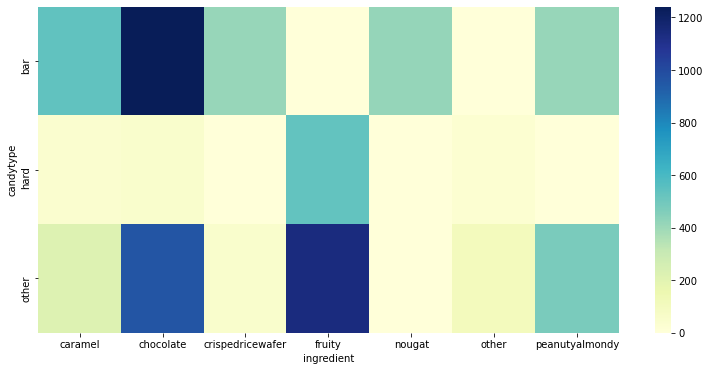

In [633]:
sns.heatmap(platform_genre_sales, cmap="YlGnBu")

Очевидно, что для леденцов топовый ингредиент это фрукты и в гораздо меньшей степени шоколад и карамель. Для батончиков это шоколад, карамель, вафли, нуга и орехи. При этом в группе other по candytype видим большой процент по fruity, chocolate и peanutyalmondy. Представляю себе шоколадные конфеты с фруктами и орехами отдалённо напоминающие шоколадные батончики)

Общий вывод можно сделать такой: 1. люди не хотят есть много сахара; тут о зубах в том числе (леденцы). 2. люди хотят сладости с какой-то минимальной или даже мнимой пользой (наличие орехов в составе). 3. Цена играет второстепенную роль.